<a href="https://colab.research.google.com/github/Aahra/End-to-End-Heart-Disease-classification-Milestone-Project-1-/blob/main/End_to_end_Heart_disease_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Predicting  heart disease using Machine learning

## This notebook looks into using various Python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has a heart disease based on their medical attributes


## We are going to take the following approach-
##1. Problem definition
#### Given clinical parameters about a patient ,can we predict whether  or not they have a heart disease or not.
##2. Data
#### <b>Resources -(UCI Machine learning repo),(Kaggle)
#### The original dataset came from the Cleveland data from the UCI machine learning repo and also has a copy on Kaggle - https://www.kaggle.com/ronitf/heart-disease-uci
##3. Evaluation-What is success for us?
#### If we can reach 95% accuracy at predicting wheher or not a patient has a heart disease during the proof of concept,we'll pursue the project.
##4. Features(of Data)
#### Create a data dictionary
###### 1. age -in years

2.sex- (1 = male; 0 = female)

3 cp- chest pain type

4.trestbps- resting blood pressure (in mm Hg on admission to the hospital)

5.chol- serum cholestoral in mg/dl

6.fbs- (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7.restecg- resting electrocardiographic results

8.thalach- maximum heart rate achieved

9.exang- exercise induced angina (1 = yes; 0 = no)

10.oldpeak- ST depression induced by exercise relative to rest

11.slope- the slope of the peak exercise ST segment

12.ca- number of major vessels (0-3) colored by flourosopy

13.thal- 3 = normal; 6 = fixed defect; 7 = reversable defect

14.target- 1 or 0
##5. Modelling
#### 
##6. Experimentation

## Preparing the Tool

We're going to use Pandas,matplotlib,NumPy,scikit learn for Data Analyis and  Manipulation

In [4]:

##IMPORT ALL THE TOOLS

#Regular EDA (exploratory  data analysis)and plotting libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
##we  want the plot  figure to appear inside the notebook

#Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve



**Load data**

In [5]:
df1= "https://raw.githubusercontent.com/Aahra/End-to-End-Heart-Disease-classification-Milestone-Project-1-/main/Datasets/heart-disease.csv"
df = pd.read_csv(df1)
df
#df.shape

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


##Data exploration (exploratory data analysis or EDA)

####The goal is to find about more thedata and  become a subject matter expert on the dataset  you're working upon.

1.What question are you trying to solve?

2.What kind of data do you  have and how do we treat different data type ?

3.What's missing from the data and howdo you deal with it??

4.Where are the outliers and why should you care about it?

5.How can you add  ,remove more features to get more from your data.

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
#Let find out  how many of each class is there
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

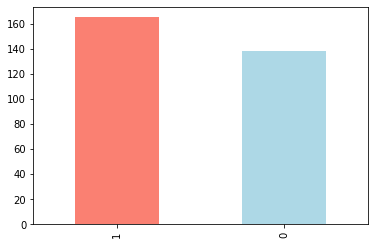

In [9]:
df.target.value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [10]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###Heart disease frequency according to sex

In [14]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [15]:
## Compare  target column with sex column

pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


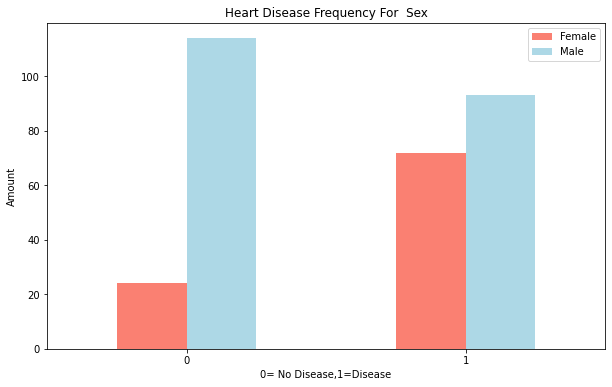

In [21]:
#Create a plot  of Crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize =(10,6),
                                   color=["salmon","lightblue"])
plt.title("Heart Disease Frequency For  Sex")
plt.xlabel("0= No Disease,1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);